In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

2023-09-04 22:14:26.557641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 22:14:26.620942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 22:14:26.623599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 22:14:28.111938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# The MNIST dataset is a collection of 70 000 grayscale images 
# of handwritten digits each with a size of 28x28 pixels.

# # load the dataset from the npz file
with np.load('mnist.npz') as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


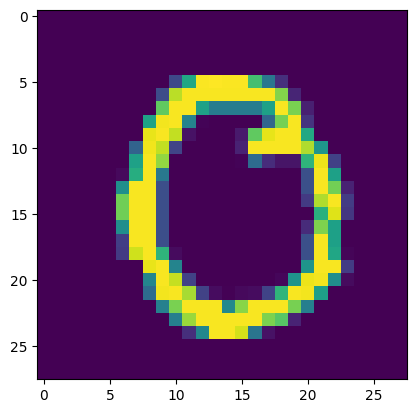

In [3]:
# Display a random image from X_train
rdm_index = random.randint(0, len(X_train))
rdm_image = X_train[rdm_index]

plt.imshow(rdm_image)

In [4]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add a channel dimension to the input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# In this code, we used `-1` as the batch size when reshaping the input data. 
# This is a common convention in deep learning frameworks like Keras and TensorFlow, 
# and it means that the batch size should be inferred automatically 
# based on the size of the input data and the number of samples.

# When you use `-1` as the batch size, the framework will automatically compute the batch size 
# based on the total number of samples in the input data. For example, if you have 1000 samples 
# in your input data and you use `-1` as the batch size, the framework will automatically set 
# the batch size to 32 if the total number of samples is divisible by 32, or to 31 if the 
# total number of samples is not divisible by 32.

# Using `-1` as the batch size can be convenient because it allows you to train your model 
# on input data of any size without having to manually specify the batch size. However, 
# keep in mind that using a larger batch size can require more memory and may slow down the training process, 
# so you may need to experiment with different batch sizes to find the best one for your model and hardware.

In [6]:
# Convert the target labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
# Print the shape of the label arrays after the conversion
print('y_train shape after conversion:', y_train.shape)
print('y_test shape after conversion:', y_test.shape)

y_train shape after conversion: (60000, 10)
y_test shape after conversion: (10000, 10)


In [8]:
# This shows that the one-hot encoding worked properly, 
# and the shape of the label arrays has been changed from 
# '(num_samples,)' to '(num_samples, num_classes)'.

In [9]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Le processus de Convolution sous-entend généralement constitué de plusieurs étapes qui se répètent dans cet ordre :

    Couche de Convolution
    Max Pooling
    Regularization



Convolution 2D

La partie convolution utilise des "filtres" pour répérer des "features" dans l'image. Les Features sont les éléments distinctifs de l'image répérés par le réseau (pour les premières couches de convolution ce sont des formes simples ie des lignes horizontales, verticales, diagonales... et pour les couches suivantes ça peut être des formes plus complexes). Ces éléments répérés par les différents filtres sont appelés des features Map. Chaque features Map représente une dimension supplémentaire de "l'image" crée en sortie.

Exemple : si la première couche de Convolution comporte 16 filtres, alors l'image résiduels sera composée de 16 dimensions (constitués par les features map)


Max Pooling

Les opérations de "maxPooling" réduise la taille des images (généralement par 2 en fonction des paramètre). Elles permettent d'extraires les caractéristiques les plus importantes et de briser la linéarité de l'image.

In [10]:
# Récapitulatif de l'architecture modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [11]:
# Sélection de l'optimiser pour la decente de gradient
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
# Train the model
# hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# 11m 25.2s

Epoch 1/10


2023-09-04 22:14:32.797854: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 60s 31ms/step - loss: 0.1450 - accuracy: 0.9560 - val_loss: 0.0493 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0478 - accuracy: 0.9848 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0322 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0340 - val_accura

In [13]:
######################################################################################

In [14]:
# Save the trained model to a pickle file
import pickle

# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [15]:
# Load the saved model from the pickle file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [16]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

# Add row and column labels to the confusion matrix
confusion_df = pd.DataFrame(confusion_mtx, index = [i for i in range(10)], columns = [i for i in range(10)])

# Print the confusion matrix
print('\n')
confusion_df

313/313 [==============================] - 4s 12ms/step




,0,1,2,3,4,5,6,7,8,9
0,975,1,1,0,0,1,1,0,0,1
1,0,1134,0,0,0,0,1,0,0,0
2,1,0,1025,0,0,0,2,4,0,0
3,0,0,0,1007,0,3,0,0,0,0
4,0,0,1,0,971,0,2,0,0,8
5,0,0,1,7,0,882,1,0,0,1
6,1,2,0,0,1,2,950,0,2,0
7,0,3,4,0,0,0,0,1016,0,5
8,0,0,4,3,0,2,0,1,962,2
9,0,0,1,0,2,0,0,1,2,1003


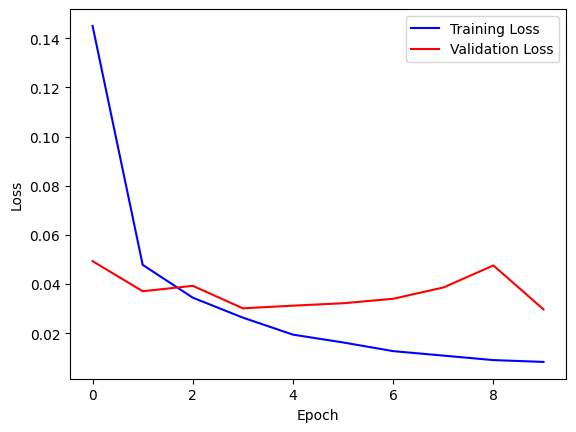

In [17]:
# This code plots the training loss and validation loss of a trained model over time. 
# The `hist` object is a dictionary that contains the training and validation loss values 
# for each epoch during training.

# This plot can be useful for evaluating the performance of a trained model. 
# If the training loss is decreasing over time but the validation loss is increasing, 
# it may be a sign of overfitting. On the other hand, 
# if both the training loss and validation loss are decreasing over time, 
# it may be a sign that the model is learning to generalize well to new data.

plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

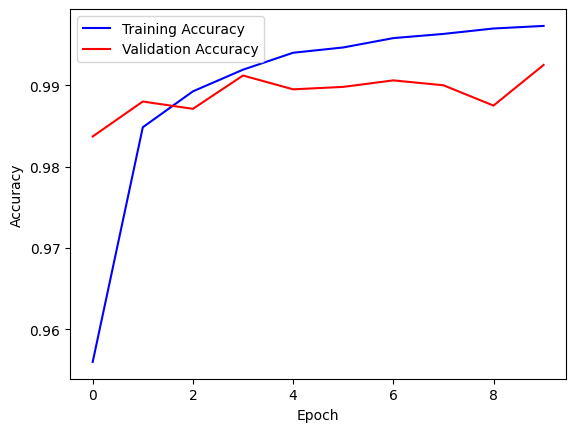

In [18]:
# This code plots the training accuracy and validation accuracy of a trained model over time. 

# This plot can be useful for evaluating the performance of a trained model. 
# If the training accuracy is increasing over time but the validation accuracy is not, 
# it may be a sign of overfitting. On the other hand, 
# if both the training accuracy and validation accuracy are increasing over time, 
# it may be a sign that the model is learning to generalize well to new data.

plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
# best so far?   loss: 0.0297 - accuracy: 0.9925

313/313 [==============================] - 4s 10ms/step - loss: 0.0297 - accuracy: 0.9925


In [20]:
####################   Tests   ####################

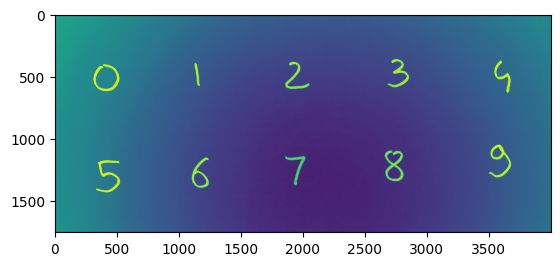

In [21]:
import cv2

# Load the image in grayscale
mine = cv2.imread('mine.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the colors
mine = cv2.bitwise_not(mine)

plt.imshow(mine)

(28, 28)


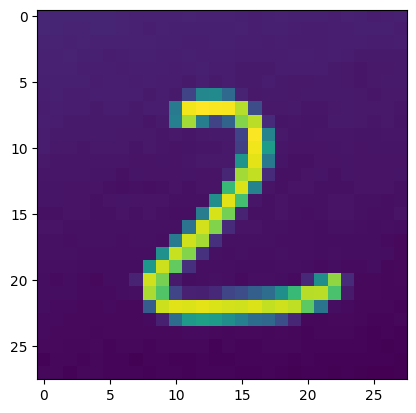

In [22]:
deux = mine[300:660,1750:2110]
deux = cv2.resize(deux, (28, 28), interpolation=cv2.INTER_AREA)
print(deux.shape)
plt.imshow(deux)

(28, 28)


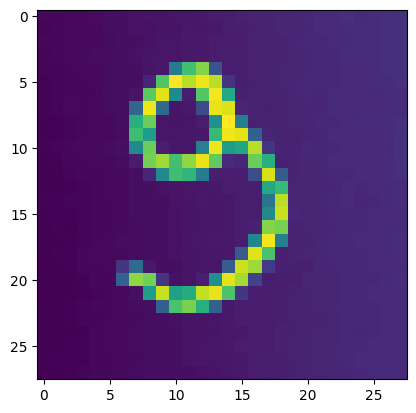

In [23]:
neuf = mine[990:1390,3400:3800]
neuf = cv2.resize(neuf, (28, 28), interpolation=cv2.INTER_AREA)
print(neuf.shape)
plt.imshow(neuf)

In [ ]:
# np.newaxis adds new axes to the `deux` array, which is a 2D NumPy array representing an image. 
# The first new axis is added at position 0 using `np.newaxis`, which adds a new dimension to the array. 
# This new axis represents the batch size of the input data, which is required by Keras when training a model. 

# The second new axis is added at position 3 using `np.newaxis`, which adds another new dimension to the array. 
# This new axis represents the number of channels in the image, which is 1 in this case since the image is grayscale.

# So the resulting shape of the `deux` array after this line of code is `(1, 28, 28, 1)`, 
# which means it has a batch size of 1, a height of 28, a width of 28, and 1 channel.

# This format is suitable for passing the image as input to a convolutional neural network (CNN) in Keras.

In [24]:
deux = deux[np.newaxis, :, :, np.newaxis]
predictions_img_2 = model.predict(deux)
print(np.argmax(predictions_img_2))

1/1 [==============================] - 0s 110ms/step
2


In [25]:
neuf = neuf[np.newaxis, :, :, np.newaxis]
predictions_img_9 = model.predict(neuf)
print(np.argmax(predictions_img_9))

1/1 [==============================] - 0s 24ms/step
9


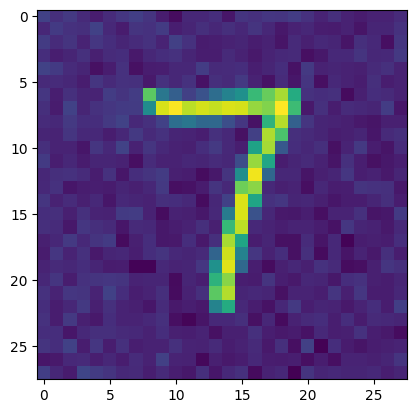

In [26]:
# Envie d'essayer après avoir ajouté du bruit à l'image (augmenter ou baisser le bruit avec scale)

sept = mine[1060:1450,1740:2130]
sept = cv2.resize(sept, (28, 28), interpolation=cv2.INTER_AREA)

# Add Gaussian noise to the image
noise = np.random.normal(loc=0, scale=7, size=sept.shape)
noisy_sept = sept + noise

# Clip the pixel values to the range [0, 255]
noisy_sept = np.clip(noisy_sept, 0, 255)

# Display the noisy image
plt.imshow(noisy_sept.astype('uint8'))
plt.show()

In [27]:
noisy_sept = noisy_sept[np.newaxis, :, :, np.newaxis]
predictions_img_noisy_sept = model.predict(noisy_sept)
print(np.argmax(predictions_img_noisy_sept))

1/1 [==============================] - 0s 46ms/step
7
